In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install dabl
import dabl

You should consider upgrading via the 'C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
print(data.shape)

(1000, 8)


In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Lets check the no. of unique items present in the categorical column

### Hayır'ı kontrol edelim. kategorik sütunda bulunan benzersiz öğelerin sayısı

In [6]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

### lets check the percentage of missing data in each columns present in the data :

### verilerde bulunan her sütundaki eksik verilerin yüzdesini kontrol etmenizi sağlar:


In [7]:
no_of_columns = data.shape[0]

In [8]:
percentage_of_missing_data = data.isnull().sum()/no_of_columns

In [9]:
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


### To see comparison of all other attributes with respect to Math Marks

### Matematik İşaretlerine göre diğer tüm özelliklerin karşılaştırmasını görmek için

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot:title={'center':'F=1.81E+03'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=8.13E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=3.06E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=1.96E-04'}, xlabel='math score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=0.00E+00'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=0.00E+00'}, xlabel='math score', ylabel='test preparation ...'>]],
       dtype=object)]

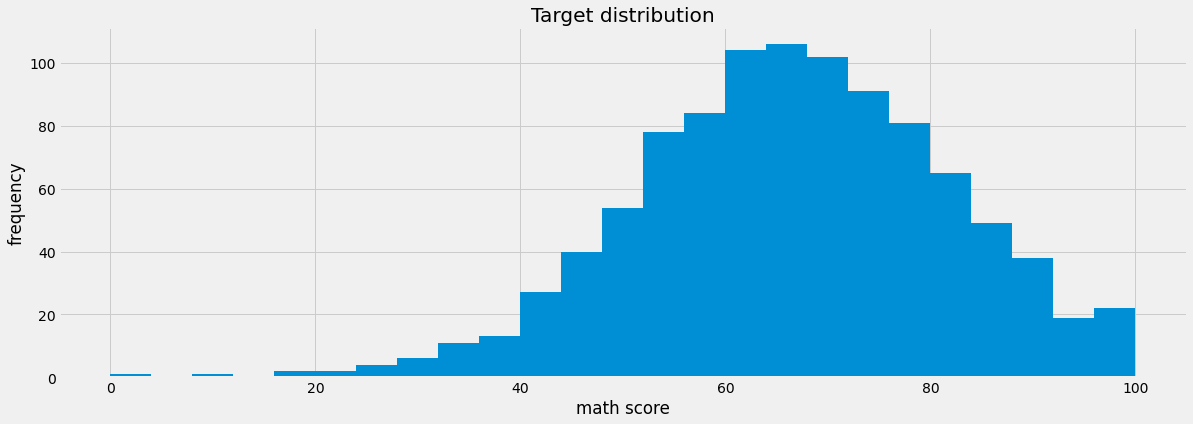

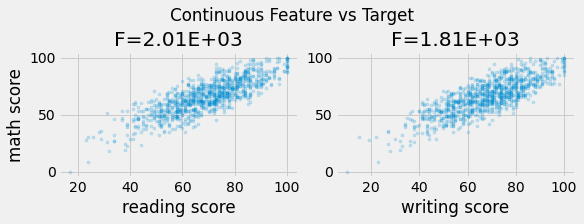

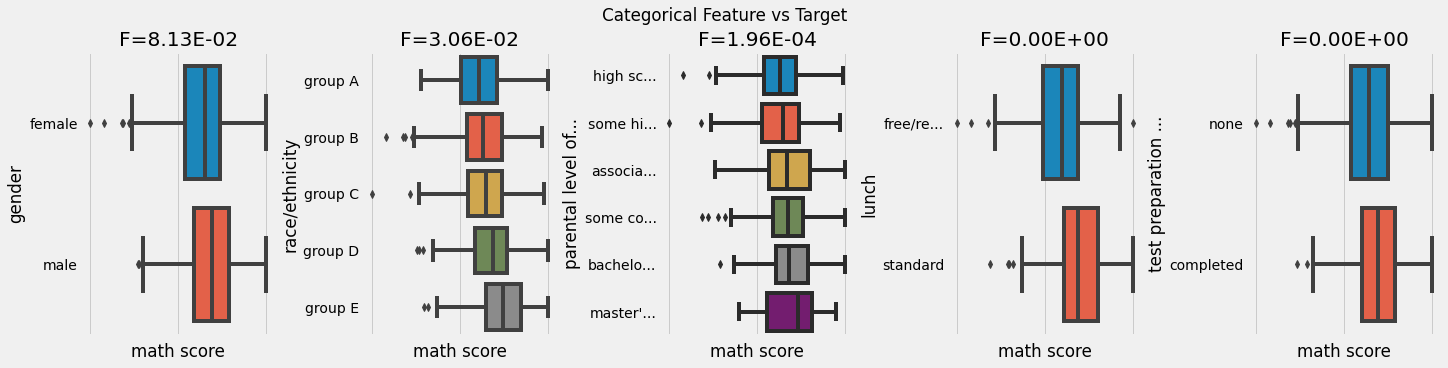

In [10]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

### Comparison of all other attributes with respect to Reading Marks :

### Okuma İşaretlerine göre diğer tüm özelliklerin karşılaştırılması:

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=1.02E+04'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=4.26E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=2.95E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=1.92E-02'}, xlabel='reading score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=8.73E-03'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=0.00E+00'}, xlabel='reading score', ylabel='test preparation ...'>]],
       dtype=object)]

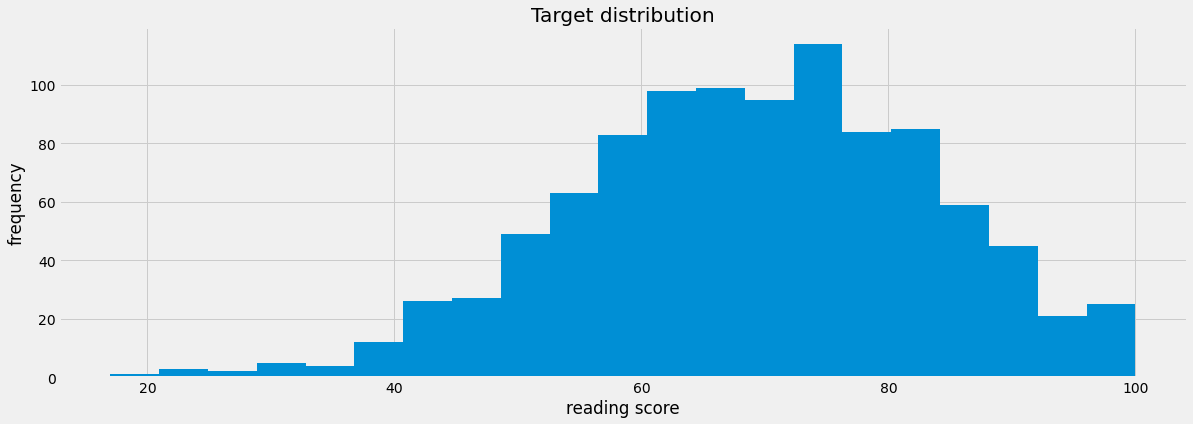

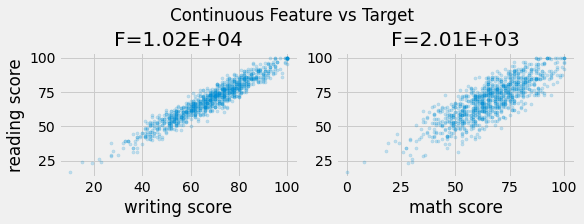

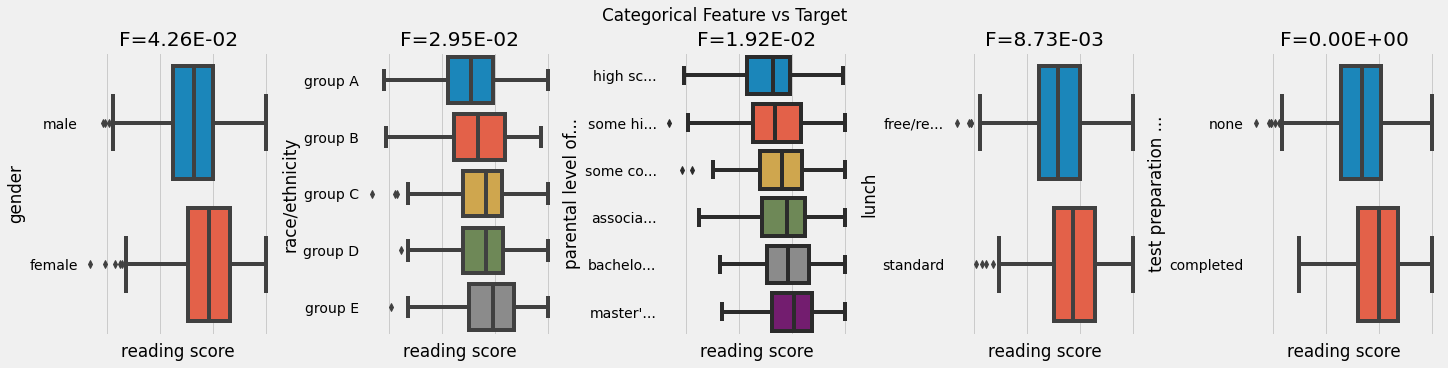

In [11]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

### Lets check the Effect of Lunch on Student’s Performnce

### Öğle Yemeğinin Öğrenci Performansı Üzerindeki Etkisini Kontrol Edelim

In [12]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

### Lets check the Effect of Test Preparation Course on Scores

### Test Hazırlık Kursunun Puanlar Üzerindeki Etkisini Kontrol Edelim

In [13]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

# Data Visualizations

### Visualizing the number of male and female in the data set

### Veri kümesindeki kadın ve erkek sayısını görselleştirme

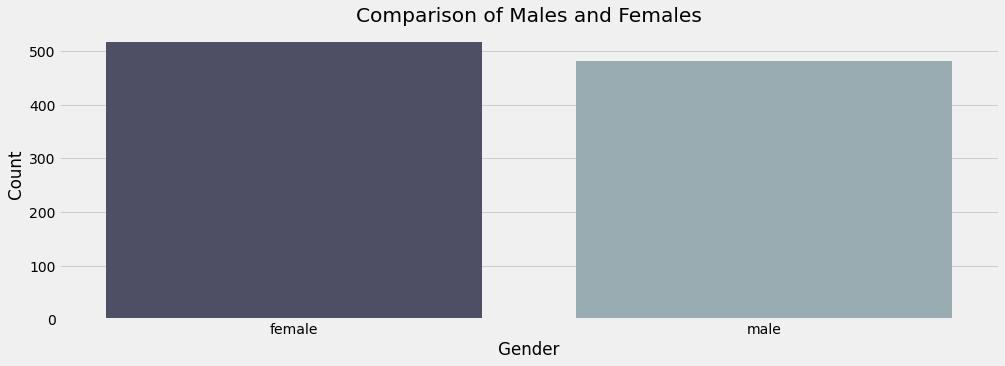

In [14]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Visualizing the different groups in the data set

### Veri kümesindeki farklı grupları görselleştirme

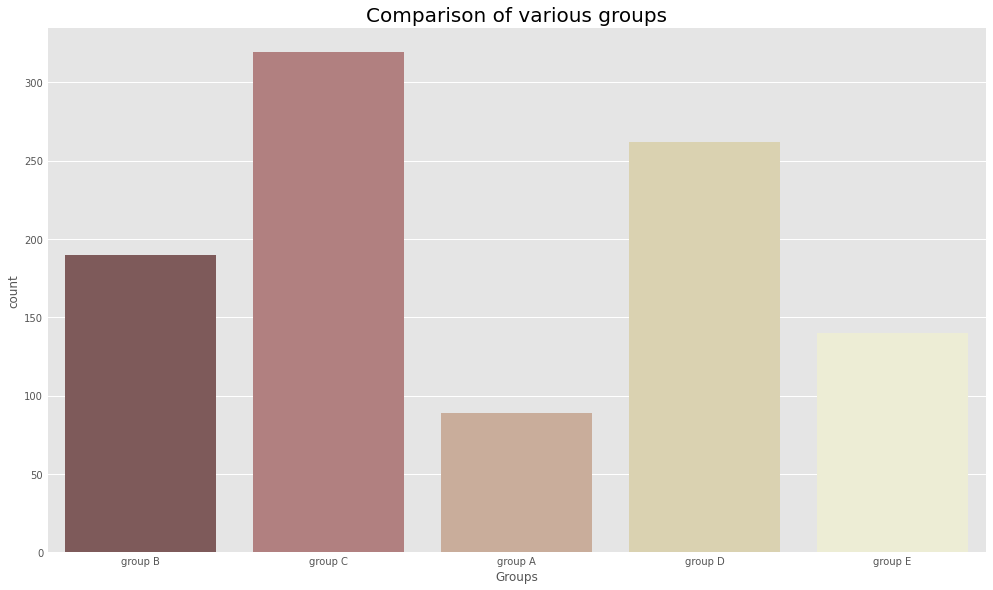

In [15]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

### Visualizing the different parental education levels

### Farklı ebeveyn eğitim düzeylerini görselleştirme

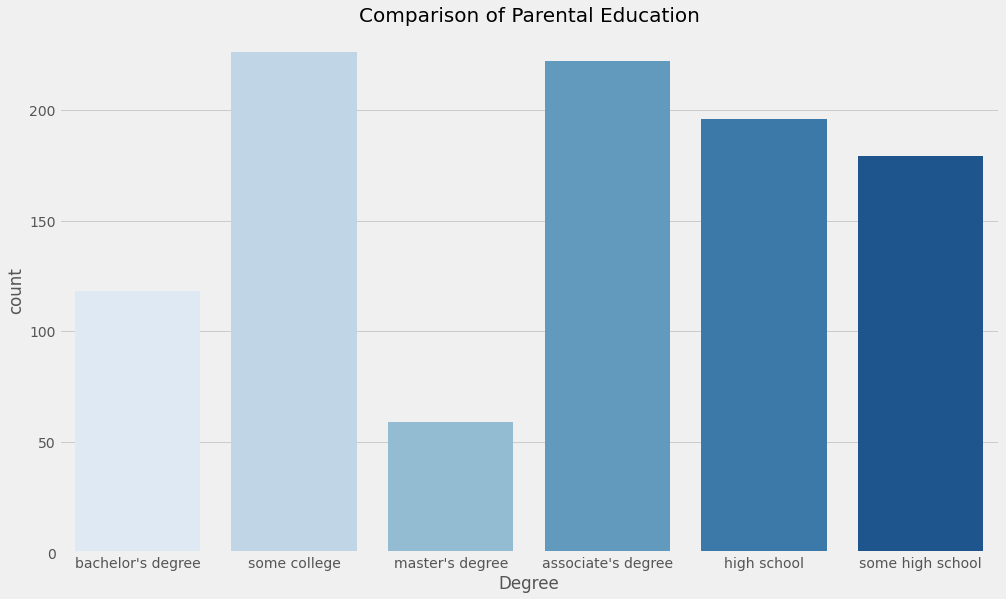

In [16]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Visualizing Maths score

### Matematik puanını görselleştirme

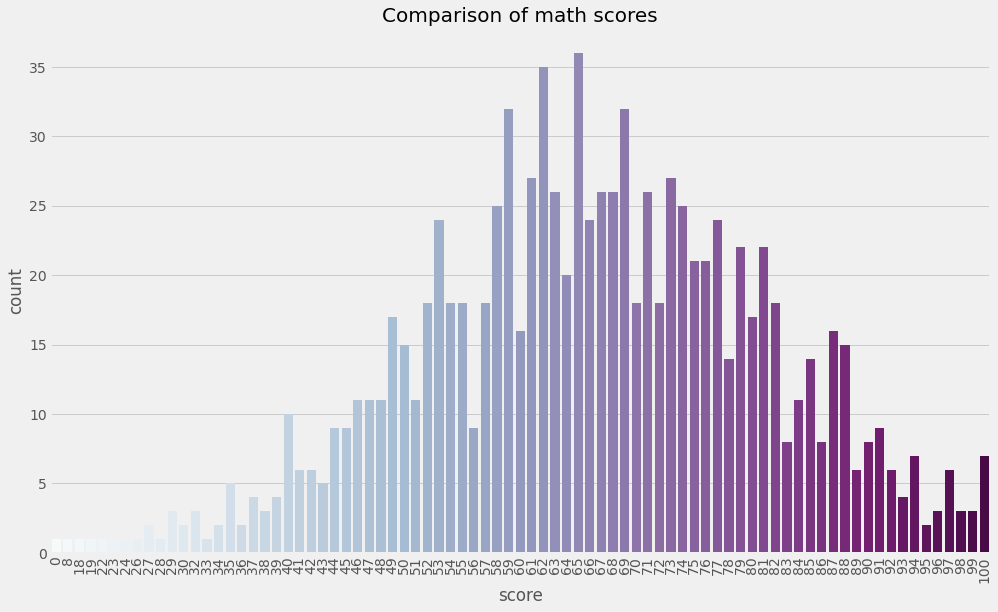

In [17]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

### Computing the total score for each student

### Her öğrenci için toplam puanın hesaplanması

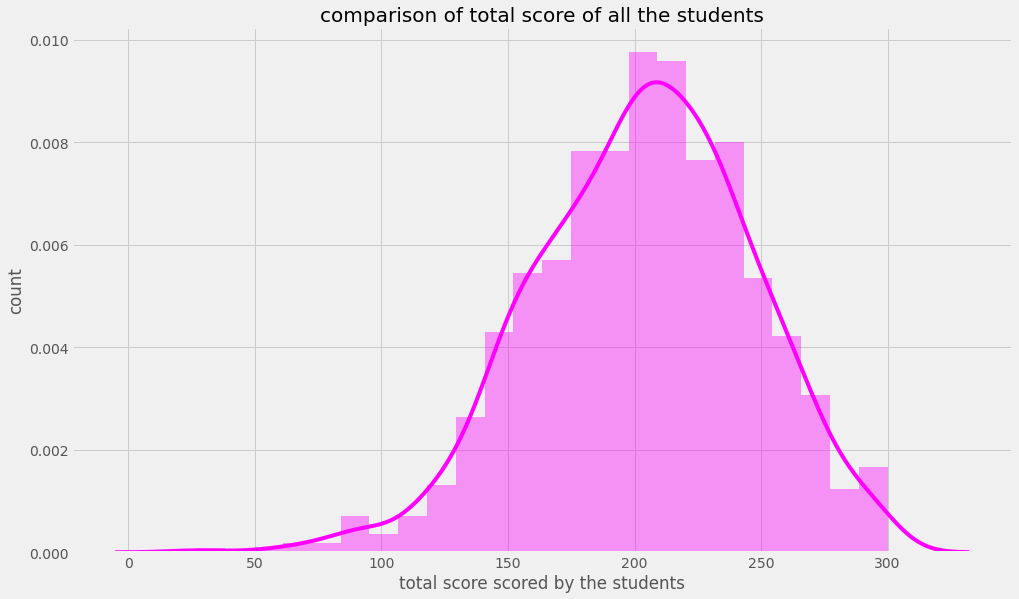

In [18]:
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

### Computing percentage for each of the students

### Her öğrenci için hesaplama yüzdesi

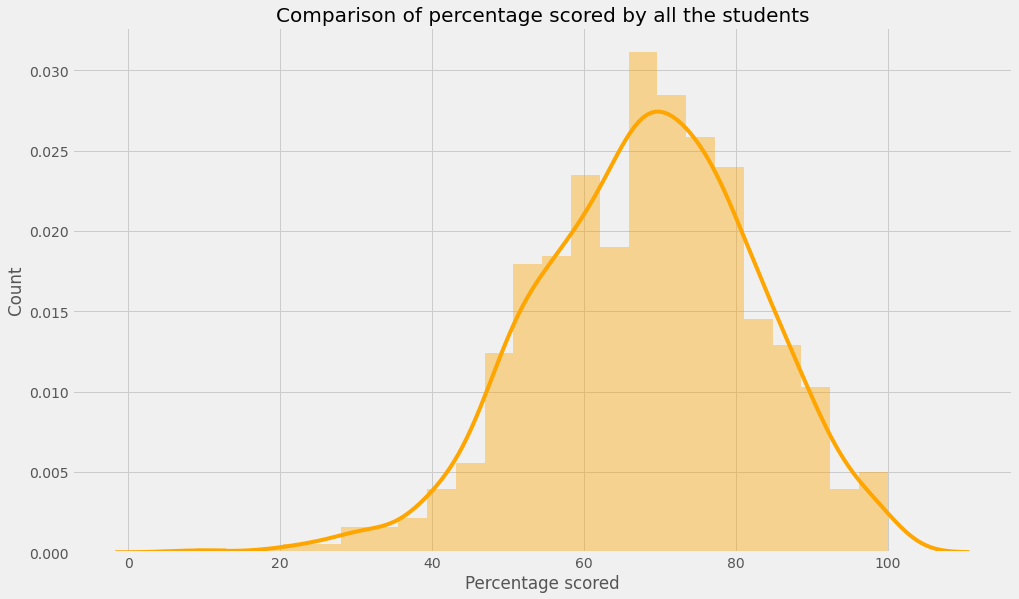

In [19]:
# importing math library to use ceil
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()